In [59]:
import pickle
import pandas as pd
import requests
import sddk

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import seaborn as sns

from sklearn.manifold import TSNE

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

In [60]:
# for exporting data to googlesheets/sciencedata
# (feel free to skip)

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
paul_results = gc.open_by_url("https://docs.google.com/spreadsheets/d/1h4M-gK9TPIfeTV528tUuPBfZF1wtcNCA10yIlJYqGTE/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [79]:
data_1to3 = pickle.load(open("../data/large_files/embeddings_1to3.pkl", "rb"))
data_4to5 = pickle.load(open("../data/large_files/embeddings_4to5.pkl", "rb"))

In [80]:
data_1to3[-1]

,εἰμί,λέγω,θεός,οὗτος,γίγνομαι,λόγος,πᾶς,ἄνθρωπος,αὐτός,ἔχω,...,χολή,συγγένεια,ἐπιφαίνω,χρίω,λίμνη,ἄνοια,σιγάω,ἀναλίσκω,ὀκτώ,κόρος
εἰμί,1.000000,0.999313,0.999386,0.999617,0.998827,0.997632,0.998620,0.996365,0.998418,0.997934,...,0.383185,0.420720,0.457354,0.409016,0.405139,0.406426,0.386402,0.393730,0.364559,0.404929
λέγω,0.999313,1.000000,0.998967,0.999342,0.998454,0.997188,0.998049,0.996010,0.998205,0.997439,...,0.387235,0.421316,0.459356,0.411176,0.405083,0.403971,0.391618,0.394767,0.365446,0.402210
θεός,0.999386,0.998967,1.000000,0.999245,0.998687,0.997445,0.998866,0.996580,0.998001,0.997516,...,0.381975,0.421682,0.461338,0.410029,0.403537,0.406821,0.388188,0.394757,0.362495,0.403034
οὗτος,0.999617,0.999342,0.999245,1.000000,0.998677,0.997956,0.998533,0.996424,0.998369,0.997942,...,0.384384,0.421604,0.458724,0.409195,0.404079,0.406907,0.387492,0.393033,0.365072,0.405355
γίγνομαι,0.998827,0.998454,0.998687,0.998677,1.000000,0.997151,0.998048,0.996145,0.997333,0.996988,...,0.384454,0.424337,0.464407,0.413830,0.410775,0.409977,0.391502,0.399161,0.370126,0.403365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ἄνοια,0.406426,0.403971,0.406821,0.406907,0.409977,0.411959,0.413806,0.415020,0.411761,0.407156,...,0.447134,0.481516,0.464135,0.412739,0.429618,1.000000,0.414957,0.409578,0.419386,0.551645
σιγάω,0.386402,0.391618,0.388188,0.387492,0.391502,0.396068,0.393815,0.395306,0.393829,0.389796,...,0.416101,0.496000,0.504560,0.455825,0.445250,0.414957,1.000000,0.456409,0.449851,0.369757
ἀναλίσκω,0.393730,0.394767,0.394757,0.393033,0.399161,0.398144,0.401389,0.403412,0.398616,0.397577,...,0.496596,0.465703,0.428387,0.438772,0.373511,0.409578,0.456409,1.000000,0.358671,0.391451
ὀκτώ,0.364559,0.365446,0.362495,0.365072,0.370126,0.367344,0.366630,0.365524,0.366993,0.364021,...,0.391042,0.495934,0.362624,0.416816,0.389343,0.419386,0.449851,0.358671,1.000000,0.356181


In [81]:
# export to gsheets
#set_with_dataframe(paul_results.add_worksheet("wordlist_1to3",1,1), pd.DataFrame(data_1to3[-1].columns))
#set_with_dataframe(paul_results.add_worksheet("wordlist_4to5",1,1), pd.DataFrame(data_4to5[-1].columns))

# Paul's nearest neighbours

In [82]:
n = 20
paul_nn = {}
for data, label in zip([data_1to3, data_4to5], ["1-3 CE", "4-5 CE"]):
    data_sorted = data[-1].sort_values("Παῦλος", ascending=False)
    paul_nn[label + " Παῦλος NNs"] = data_sorted.index.tolist()[1:n+1]
    paul_nn[label + " Παῦλος CoS."] = data_sorted["Παῦλος"].tolist()[1:n+1]

In [83]:
paul_nn_df = pd.DataFrame(paul_nn)
paul_nn_df

,1-3 CE Παῦλος NNs,1-3 CE Παῦλος CoS.,4-5 CE Παῦλος NNs,4-5 CE Παῦλος CoS.
0,ἀπόστολος,0.844046,ἀπόστολος,0.791975
1,ἀκούω,0.820043,αἵρεσις,0.789347
2,Ἰησοῦς,0.817240,πίστις,0.784024
3,Χριστός,0.815906,ἐκκλησία,0.782043
4,ἅγιος,0.811205,ἐπίσκοπος,0.778997
5,πιστεύω,0.808687,δόξα,0.777550
6,πνεῦμα,0.807754,υἱός,0.776600
7,ἔρχομαι,0.807070,δέχομαι,0.774253
8,πίστις,0.806641,ὄνομα,0.773983
9,υἱός,0.806529,Πέτρος,0.773474


In [84]:
#set_with_dataframe(paul_results.worksheet("paul_20NN"), paul_nn_df)

# Manually anotated words

In [85]:
coding_words = get_as_dataframe(paul_results.worksheet("coding_words"))
coding_words[:10]

,jewish devotion,"martyrdom, imprisonment, suffering",christology & mariology,eschatology,eclesiology
0,Ἰουδαῖος,μαρτυρία,υἱός,κρίσις,ἐκκλησία
1,λαός,διώκω,κύριος,ἀπώλεια,διάκονος
2,Ἑβραῖος,θηρίον,μόνος,ἀποκάλυψις,ποιμήν
3,Ἱεροσόλυμα,ξίφος,Χριστός,ἀποκαλύπτω,ἐπίσκοπος
4,ἱερεύς,μαρτύρομαι,Ἰησοῦς,παρουσία,πρεσβύτης
5,θυσία,πάθη,γεννάω,θρόνος,κοινωνέω
6,νομός,μάστιξ,γωνία,ἄγγελος,κοινωνία
7,συναγωγή,δεσμωτήριον,ἀγέννητος,στοιχεῖον,αἵρεσις
8,διαθήκη,ἀναιρέω,σώζω,ὀργή,τάξις
9,πάσχα,τελευτάω,ῥίζα,σημεῖον,ἐπισκοπή


# Embeddings plots

In [86]:
def get_tsne_coors(svd_matrix, perplexity=18):
    # inverse similarity to distance
    #data = (1 - sim_matrix) / 1
    words = svd_matrix.index
    #data.round(5)
    # tSNE to project all words into a 2-dimensional space
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, metric='cosine', n_iter=1000) # dissimilarity="precomputed",
    #tsne = TSNE(n_components=2, random_state=42, perplexity=18, metric='precomputed', n_iter=5000) # dissimilarity="precomputed",
    pos = tsne.fit_transform(svd_matrix) # project all points into space
    xs, ys = pos[:, 0], pos[:, 1]
    # extract minimal and maximal values
    minmax = [pos[:, 0].min(), pos[:, 0].max(), pos[:, 1].min(), pos[:, 1].max()]
    # normalize on scale from 0 to 1
    xs = (xs - minmax[0]) / (minmax[1] - minmax[0])
    ys = (ys - minmax[2]) / (minmax[3] - minmax[2])
    return xs, ys, words

In [87]:
nns = paul_nn_df["1-3 CE Παῦλος NNs"].tolist()
nns

['ἀπόστολος',
 'ἀκούω',
 'Ἰησοῦς',
 'Χριστός',
 'ἅγιος',
 'πιστεύω',
 'πνεῦμα',
 'ἔρχομαι',
 'πίστις',
 'υἱός',
 'δίδωμι',
 'δύναμις',
 'κύριος',
 'Ἰουδαῖος',
 'ὅλος',
 'λαμβάνω',
 'εὐαγγέλιον',
 'πατήρ',
 'ὁράω',
 'σωτήρ']

In [88]:
def df_slice(df, n):
    return df[:n][df.columns[:n]]

In [89]:
df_slice(data_1to3[-2], 10)

,0,1,2,3,4,5,6,7,8,9
εἰμί,28.221130,13.076476,-0.018824,-3.149551,1.190957,-1.411451,3.858876,-0.080618,-1.093303,-0.985431
λέγω,27.873432,12.798729,-0.376839,-2.613343,1.223653,-1.820955,3.769112,0.035714,-1.181243,-0.900121
θεός,28.129452,12.969134,-0.180527,-3.017764,0.776360,-1.210652,3.913209,-0.440851,-1.082502,-0.818313
οὗτος,27.657624,12.717009,0.146509,-2.790321,1.085534,-1.604157,3.749572,-0.106147,-1.025003,-0.980209
γίγνομαι,27.263267,12.373481,-0.209794,-2.626285,1.149186,-1.148117,3.516880,-0.350746,-1.090183,-1.148141
λόγος,27.066855,12.134553,0.630419,-2.283378,0.910490,-1.200416,3.640400,0.137894,-0.946860,-0.776505
πᾶς,26.999586,12.173736,0.000400,-2.910795,0.764288,-1.121439,3.428747,-0.338931,-0.804591,-0.901515
ἄνθρωπος,26.633123,11.640540,0.534429,-2.637318,0.601636,-1.123238,2.841139,-0.276805,-1.150068,-0.744992
αὐτός,26.559261,11.955123,0.160114,-2.846184,1.052888,-1.428412,3.214024,-0.096170,-0.902651,-1.021764
ἔχω,26.633446,11.910636,0.081897,-2.867747,0.872620,-1.041576,3.288282,0.353032,-0.885063,-0.754813


In [90]:
def draw_special_words(wordlist, color):
    color_idx = [word[0] for word in enumerate(words) if word[1] in wordlist]
    for x,y,w in zip(xs[color_idx], ys[color_idx] - 0.003, words[color_idx]):
        ax.text(x,y,w, horizontalalignment='center', fontsize=5, color=color, zorder=3)

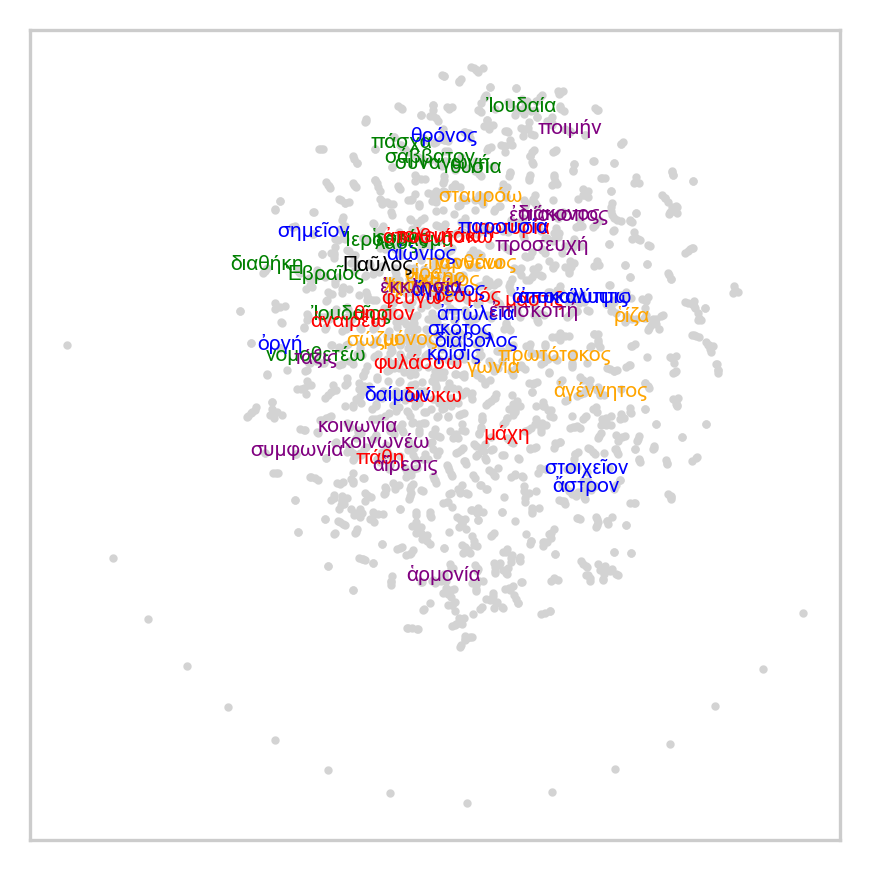

In [91]:
n = 2000
n_coded = 15
xs, ys, words = get_tsne_coors(df_slice(data_1to3[-2], n), perplexity=5)

fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

# paul
paul_idx = [word[0] for word in enumerate(words) if word[1] == "Παῦλος"]
ax.text(xs[paul_idx], ys[paul_idx], words[paul_idx][0], horizontalalignment='center', fontsize=5, color="black", zorder=4)

# all words as dots if not in lists
dots_idx = [word[0] for word in enumerate(words) if word[1] not in []]
ax.scatter(xs[dots_idx], ys[dots_idx], s=1, color="lightgrey", zorder=1)

# jewishness
#green_idx = [word[0] for word in enumerate(words) if word[1] in coding_words["jewish devotion"].tolist()[:n_coded]]
#for x,y,w in zip(xs[green_idx], ys[green_idx] - 0.003, words[green_idx]):
#    ax.text(x,y,w, horizontalalignment='center', fontsize=5, color="green", zorder=3)
for col, color in zip(coding_words.columns, ["green", "red", "orange", "blue", "purple"]):
    wordlist = coding_words[col].tolist()[:n_coded]
    draw_special_words(wordlist, color)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

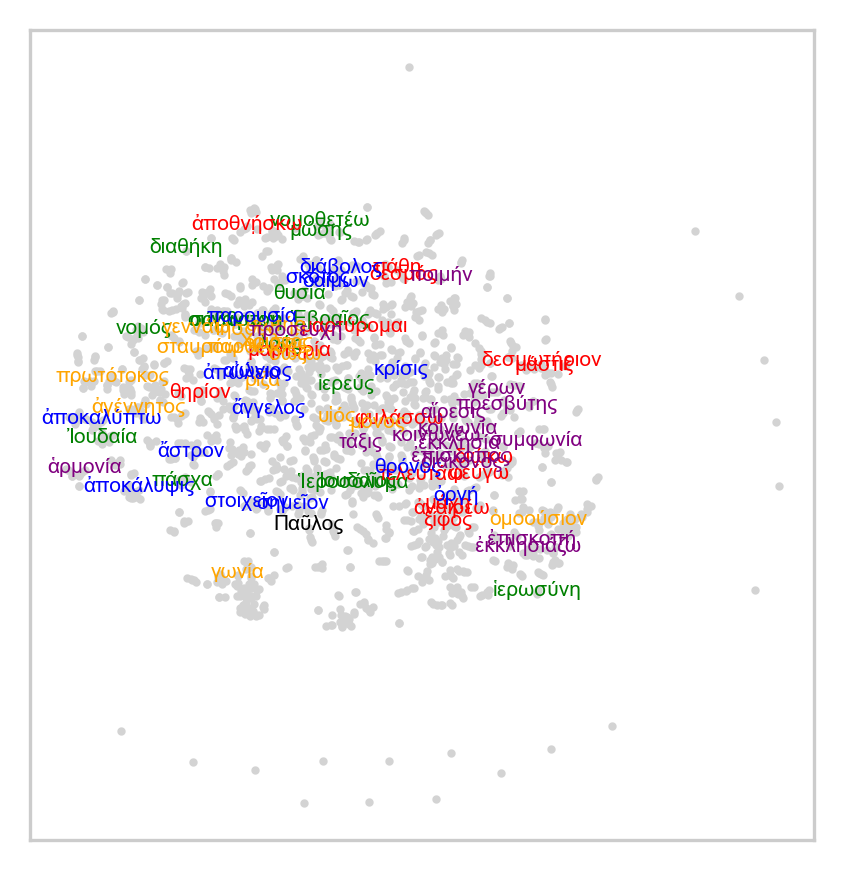

In [93]:
n = 2000
n_coded = 15
xs, ys, words = get_tsne_coors(df_slice(data_4to5[-2], n), perplexity=5)

fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

# paul
paul_idx = [word[0] for word in enumerate(words) if word[1] == "Παῦλος"]
ax.text(xs[paul_idx], ys[paul_idx], words[paul_idx][0], horizontalalignment='center', fontsize=5, color="black", zorder=4)

# all words as dots if not in lists
dots_idx = [word[0] for word in enumerate(words) if word[1] not in []]
ax.scatter(xs[dots_idx], ys[dots_idx], s=1, color="lightgrey", zorder=1)

# jewishness
#green_idx = [word[0] for word in enumerate(words) if word[1] in coding_words["jewish devotion"].tolist()[:n_coded]]
#for x,y,w in zip(xs[green_idx], ys[green_idx] - 0.003, words[green_idx]):
#    ax.text(x,y,w, horizontalalignment='center', fontsize=5, color="green", zorder=3)
for col, color in zip(coding_words.columns, ["green", "red", "orange", "blue", "purple"]):
    wordlist = coding_words[col].tolist()[:n_coded]
    draw_special_words(wordlist, color)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)